# Project: Investigate No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset 'No show appointments' has been selected for this project. This dataset collects information from 100k medical appointments in Brazil.

** No show appointments **



> 1. <b> PatientID </b> shows ID of Patient
> 2. <b> AppointmentID </b> shows appointment ID of Patient
> 3. <b> Gender </b> which is male (M) or female (F)
> 4. <b> ScheduledDay </b> tells us on what day the patient set up their appointment.
> 5. <b> AppointmentDay </b> tells us on what day the patient has actually made appointment
> 6. <b> Age </b> tells us age of patient
> 7. <b> Neighborhood </b> indicates the location of the hospital.
> 8. <b> Scholarship </b> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
> 9. <b> Hipertension </b> 1 if patient has Hipertension, 0 if not 
> 10. <b> Diabetes </b> 1 if patient has Diabetes, 0 if not
> 11. <b> Alcoholism </b> 1 if patient has Alcoholism, 0 if not
> 12. <b> Handcap </b> 1 if paitient is handicap, 0 if not
> 13. <b> SMS received </b> 1 if patient receive SMS, 0 if not
> 14. <b> No-Show </b> it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Posting Questions
This analysis is focused on 2 main questions:
> - Whether male or female has more visited to doctor/ what ages/ day of weeks
> - Gender vs Disease

Start from import library need for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Import data and print out few lines to see what informaton look like

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check datatype. There is no missing data however schedule day and appointment day is not in date time format. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

Change format of day to datetime. Create new column to show appointment day of week

In [6]:
x = df['ScheduledDay'].apply(lambda x: x.split('T')[0])
y = df['AppointmentDay'].apply(lambda x: x.split('T')[0])

df['ScheduleDay_Format'] = pd.to_datetime(x,format = '%Y-%m-%d')
df['AppointmentDay_Format'] = pd.to_datetime(y,format = '%Y-%m-%d')

df['DayofWeekAppointment'] = df['AppointmentDay_Format'].dt.dayofweek

days = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri',5: 'Sat',6:'Sun'}

df['DayofWeekAppointment'] = df['DayofWeekAppointment'].apply(lambda x: days[x])

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleDay_Format,AppointmentDay_Format,DayofWeekAppointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,Fri
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Fri
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Fri
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,Fri
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,Fri


Investigate column 'Age' to see overview of information

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

We found out that maximum age is 115 and minimum age is -1. There seems to be some wrong information in this column.
We need to clean it by keep only age >= 0 and <= 100.

In [9]:
df = df[(df['Age'] <= 100) & (df['Age'] >=0)]

# <a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Identify whether male or female has more visited to doctor/ what ages/ day of weeks

Start from checking whether female or male has visited doctore more often.
This can be done by plot bar chart by count number of visit vs Gender.

The result shows female has higher number of doctor visit than male.

Text(0.5,1,'# of visit by Gender')

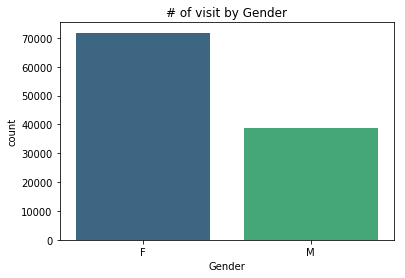

In [18]:
sns.countplot(x = 'Gender', data = df, palette = 'viridis')

plt.title ('# of visit by Gender')

However, I would like to check whether age has any related factors to the visit. I am using distribution plot to see # of visits vs age and gender of patient.

The result shows that male has higher number of visit when age is around 15 years old. After that woman has higher number of vist. After around 65 years old, number of visit of both male and female is getting close.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


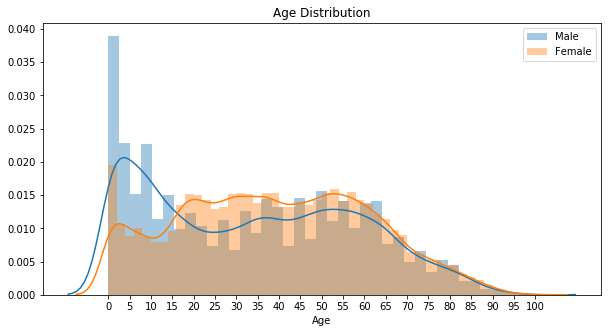

In [13]:
male = df[df['Gender']=='M']['Age']
female = df[df['Gender']=='F']['Age']

plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 105, step=5))
plt.title ('Age Distribution')

sns.distplot(male,hist = True, kde = True, label = 'Male')
sns.distplot(female,hist = True, kde= True, label = 'Female')
plt.legend(['Male','Female'])

Another question is what day in the week has patient visit the most and the less.
I do it using bar plot select day of week as x-axis, and count # of visit separate by Gender

The result shows that Tue and Wed are the peak day of appointment for both Gender. Thursday is the lowest patient visit day.

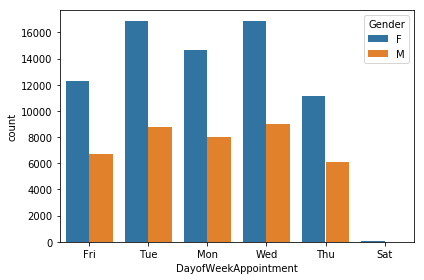

In [14]:
sns.countplot(x='DayofWeekAppointment',data = df, hue ='Gender')

plt.tight_layout()

One thing very interesting is, if patient receive SMS. Then it shoudl influent them to visit doctor more than those patients with out getting SMS. I investigate it using bar plot separate male and female.

The results show that there is no clear relationship between patient who receive sms compare to patien who don't receive SMS

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

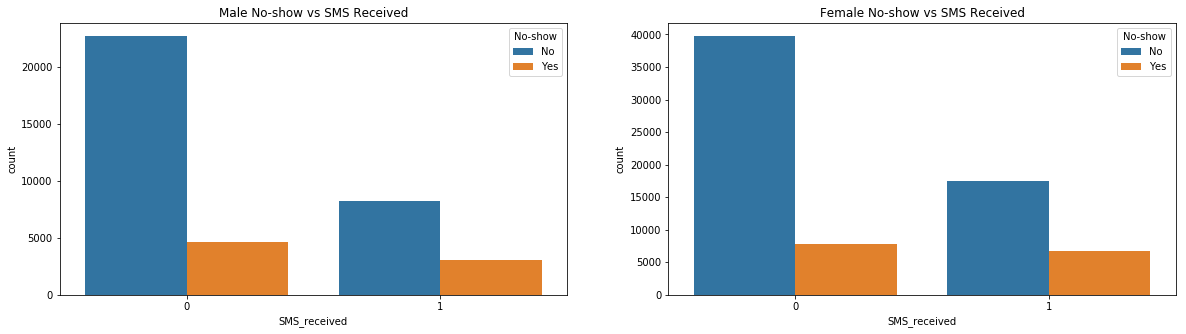

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title ('Male No-show vs SMS Received')
sns.countplot('SMS_received', data = df[df['Gender']=='M'] ,hue ='No-show')

plt.subplot(1,2,2)
plt.title ('Female No-show vs SMS Received')
sns.countplot('SMS_received', data = df[df['Gender']=='F'] ,hue ='No-show')

plt.tight_layout

### Research Question 2: Gender vs Diesese

I am interested to see whether Gender has something to do with diseases and which disease has high relationship with other diesease (i.e. if patient is alcoholism, is he going to have diabetes? etc.)

Starting with first question. I have group gender and plot each diesease by percentage.

The results clearly shows that male has higher percentage of Alcoholism while hypertension and diabetes found more often in female.

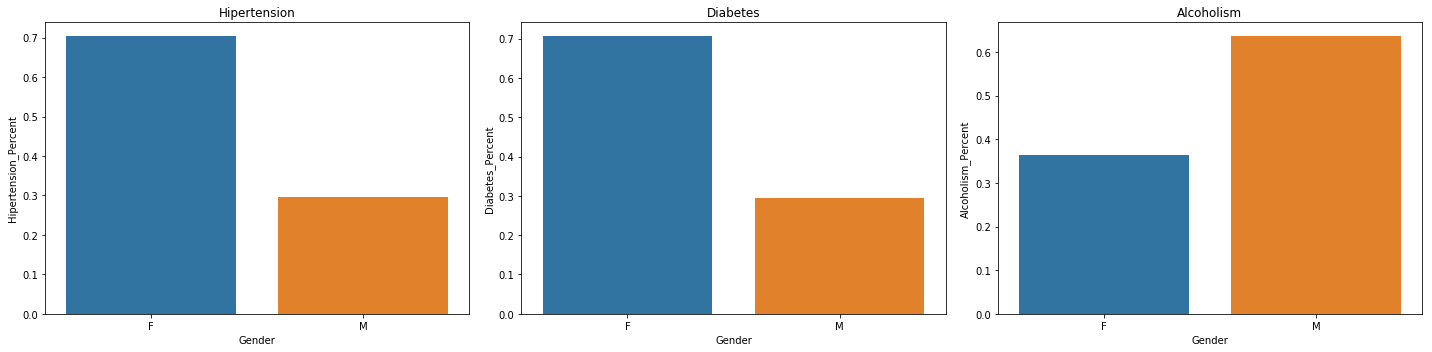

In [16]:
df1 = df.groupby(by = 'Gender').sum().reset_index()

disease = ['Hipertension', 'Diabetes', 'Alcoholism']

plt.figure (figsize = (20,5))

for i,x in enumerate(disease):
    
    df1[x + '_Percent'] = df1[x]/df1.sum()[x]
    
    plt.subplot(1,3,i+1)
    
    sns.barplot(x = df1['Gender'], y= df1[x+'_Percent'])
    
    plt.title(x)

plt.tight_layout()

Then I try to see the relationship between dieases. It was done by lot correlation between each diesease.

The results shows that there is small relationship between Alcoholism and hipertension

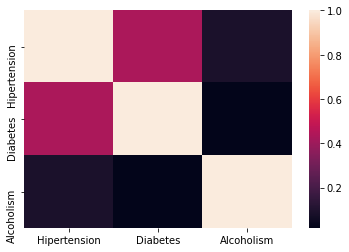

In [17]:
df_corr = df.corr().loc['Hipertension':'Alcoholism','Hipertension':'Alcoholism']

sns.heatmap(df_corr)

# <a id='conclusions'></a>
## Conclusions

2 main questions have been investigated from raw data.
- Gender vs doctor visit
- Gender vs disease

We can conclude that 
1. Female has more frequent visit that male in general. However, when we drill down in to more detail. Male has higher number of visit when age is around 15 years old. After that woman has higher number of vist. After around 65 years old, number of visit of both male and female is getting close.
2. Tue and Wed are the peak day of appointment for both Gender. Thursday is the lowest patient visit day.
3. No clear relationship of show / no-show between patient who receive sms compare to patien who don't receive SMS
4. Male has higher alcoholism compare to Female
5. There is small correlation between Alcoholism and Hipertension. This point needs to be more investigated.

### Limitations

From this analysis we have investigated data with consideration that Age of patient can start from 0 which in this dataset (after cleaning), we still see quite many male patient has age range between 0 - 10 year-old, while female patient age seems to be higher. This point need to be investigated more in details.